**Tasks:**
1. Check missing values, if there then fix that
2. Gender distribution
3. Age distribution
4. Annual income distribution
5. Spending score distributions
6. Check the correlation with spending score
7. Annual income vs spending score, also consideration with Gender
8. Gender vs spending score
9. Age vs spending score considering gender
10. Segmentation of Annual income vs spending score K-Means - Also Include Clusters choosing using Elbow method(Manual and KneeLocator) and Silhoutee Score 
11. Segmentation of Annual income vs spending score DBScan - silhouette_score
12. Segmentation of Age vs spending score K-Means - Also Include Clusters choosing using Elbow method(Manual and KneeLocator) and Silhoutee Score 
13. Segmentation of Age vs spending score DBScan - silhouette_score

**Import necessary libraries**

In [1]:
!pip install --upgrade kneed

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from kneed import KneeLocator, DataGenerator
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN

In [5]:
path="Mall_Customers.csv"
data = pd.read_csv(path)
data.head()

CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

In [6]:
# Check columns and its data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
# Describe the columns
data.describe()

CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000

**1. Check missing values**


In [8]:
data.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

**Observation:** There are no null values

**2. Gender distribution**

Text(0.5, 1.0, 'Gender distribution')

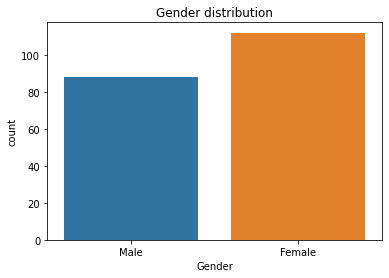

In [9]:
sns.countplot(x='Gender', data=data)
plt.title("Gender distribution")

**Observation:** There are more female customers as comparison to male. So seems female used to do more shopping but can't conclude from this whether they spend more or not

**3. Age distribution**

In [10]:
data['Age'].describe()

count    200.000000
mean      38.850000
std       13.969007
min       18.000000
25%       28.750000
50%       36.000000
75%       49.000000
max       70.000000
Name: Age, dtype: float64

/Users/vikaspuri/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Age distribution')

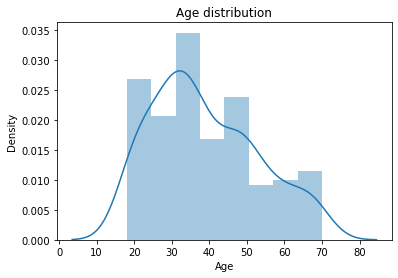

In [11]:
sns.distplot(data['Age'])
plt.title("Age distribution")

/Users/vikaspuri/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Customer Age distribution')

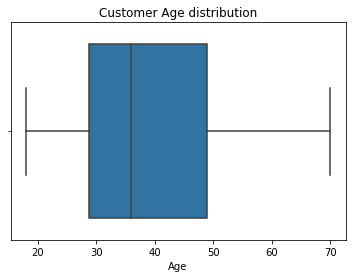

In [12]:
sns.boxplot('Age', data=data)
plt.title("Customer Age distribution")

**Observation:** The data is right skewed in which we can see that 75% of our customer lies in the range of 18-50 years. The youngest customer is of 18 year and oldest is having 70 year of age.

**4. Annual income distribution**

In [13]:
data['Annual Income (k$)'].describe()

count    200.000000
mean      60.560000
std       26.264721
min       15.000000
25%       41.500000
50%       61.500000
75%       78.000000
max      137.000000
Name: Annual Income (k$), dtype: float64

/Users/vikaspuri/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Income distribution')

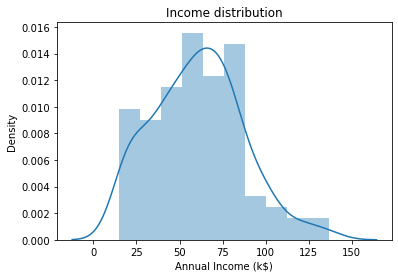

In [14]:
sns.distplot(data['Annual Income (k$)'])
plt.title("Income distribution")

Text(0.5, 1.0, 'Annual income distribution')

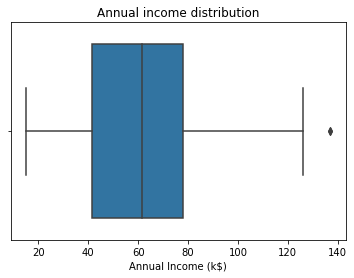

In [15]:
sns.boxplot(x='Annual Income (k$)', data=data)
plt.title("Annual income distribution")

**Observation:** The data seems to be a bit left skewed where minimum salary earned by the person is 15000 dollars, and the maximum income is of 137000 dollars. Here approximately 75% of the customer are having annual income less than 78000 dollars

**5. Spending score distributions**

In [16]:
data['Spending Score (1-100)'].describe()

count    200.000000
mean      50.200000
std       25.823522
min        1.000000
25%       34.750000
50%       50.000000
75%       73.000000
max       99.000000
Name: Spending Score (1-100), dtype: float64

/Users/vikaspuri/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Spending Score distribution')

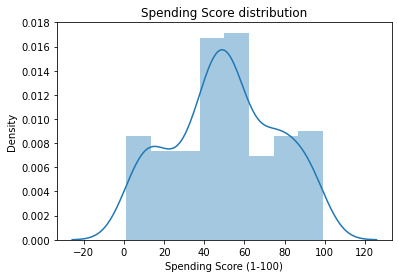

In [17]:
sns.distplot(data['Spending Score (1-100)'])
plt.title("Spending Score distribution")

/Users/vikaspuri/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Spending Dist')

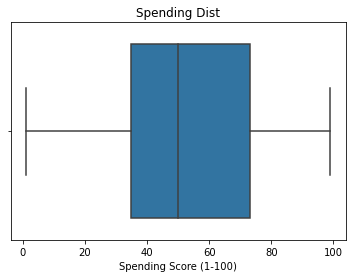

In [18]:
sns.boxplot('Spending Score (1-100)', data=data)
plt.title('Spending Dist')

**Observation:** The score seems to be right skewed

**6. Check the correlation with spending score**

In [19]:
data.drop('CustomerID', axis=1, inplace=True)

In [20]:
#Encode Gender
data['isMale'] = pd.get_dummies(data['Gender'], drop_first=True)

<AxesSubplot:>

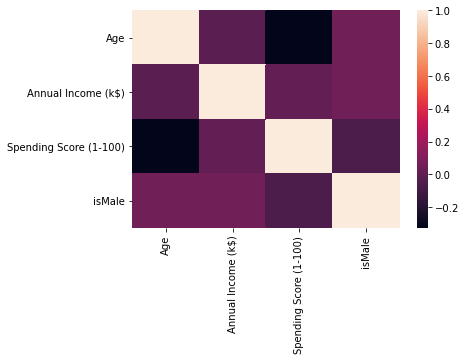

In [21]:
sns.heatmap(data.corr())

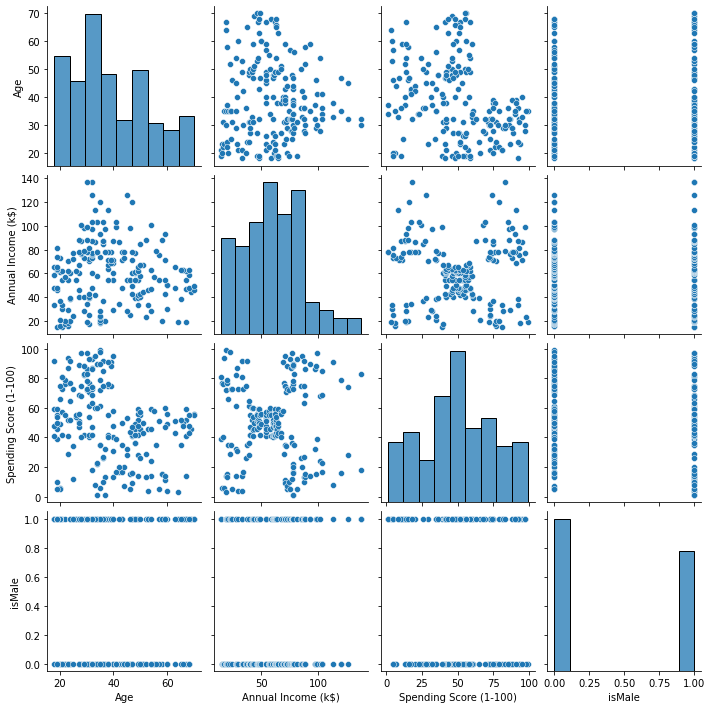

In [22]:
sns.pairplot(data)

**Observation:** By looking here we cannot say Spending score is linked to Age, income or gender

**7. Annual Income vs Spending Score with Gender**

Text(0.5, 1.0, 'Income vs Spending')

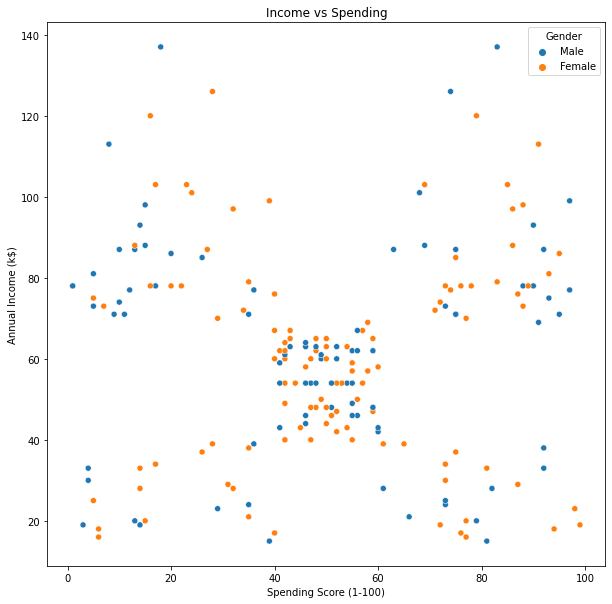

In [23]:
plt.figure(figsize=(10,10))
sns.scatterplot(x='Spending Score (1-100)', y='Annual Income (k$)', hue='Gender', data=data)
plt.title("Income vs Spending")

**Observation:** There seems to be 5 differnt categories of the customers.\
Spending score           |        Income(k in dollars)      |  Majority of Genders\
1-40                     |     15-40                        |   Female\
1-40                     |     70-138                       |   Male\
40-60                    |     40-65                        |   Female\
60-100                   |     10-40                        |   Female\
60-100                   |     70-138                       |   Female
              
Most of the spending score is between 40-60 with the customers who is having annual income between 40-65k dollars. This range is having more female customers as compared to male. We can target the female customers having income in the range of 40-65k dollars. or if in generic way all genders in the range of 40-65k income

**8. Gender vs Spending score**

Text(0.5, 1.0, 'Gender wise spending score')

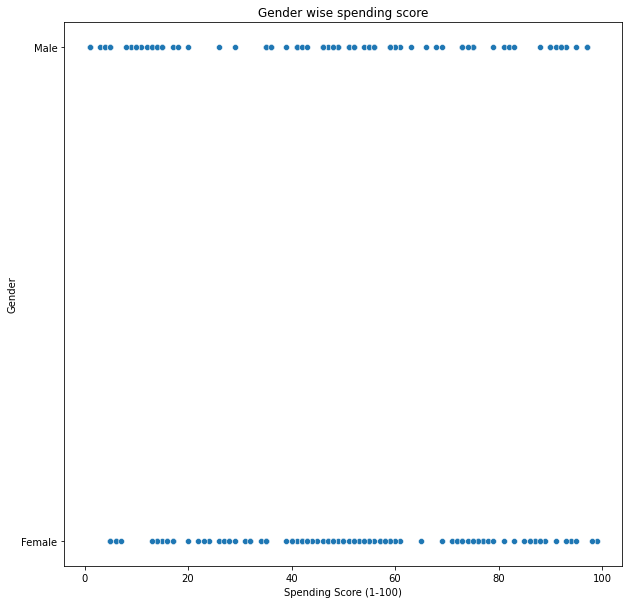

In [24]:
plt.figure(figsize=(10,10))
sns.scatterplot(x='Spending Score (1-100)', y='Gender', data=data)
plt.title("Gender wise spending score")

**Observation:** Only for Spending score range from 1-20, there are more Male customer, above 20 score Female customers are in majority.

**9. Age vs spending score considering Gender**

Text(0.5, 1.0, 'Age vs Spending score')

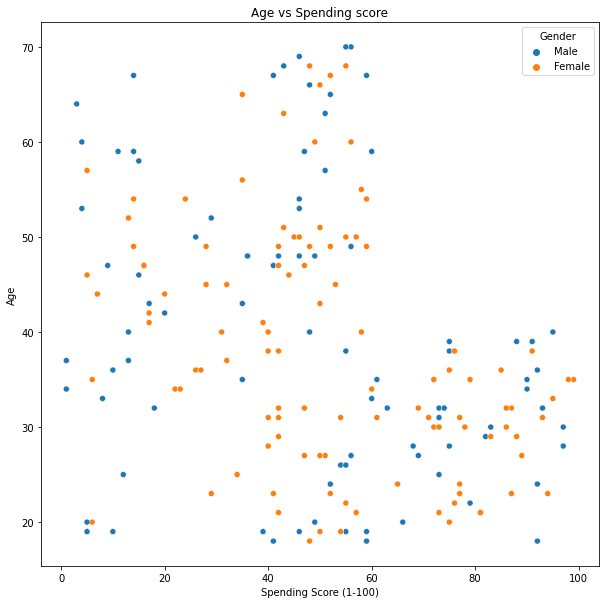

In [25]:
plt.figure(figsize=(10,10))
sns.scatterplot(x='Spending Score (1-100)', y='Age', hue="Gender", data=data)
plt.title("Age vs Spending score")

**Observation:** There is clear indication that there are only customers in age group 18-40 independent of Gender having spending score above 60. So We should target on the customers in age group 18- 40

**9. Income vs Spending Score K-means clustering**

In [26]:
# Transform the data to get the better result, as we are using the distance based calculations
columns_to_transform = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
data_to_transform = data[columns_to_transform]
for i in columns_to_transform:
    # fit on training data column
    scale = StandardScaler().fit(data_to_transform[[i]])
    
    # transform the training data column
    data_to_transform[i] = scale.transform(data_to_transform[[i]])
    
data_to_transform.head()

<ipython-input-26-0e8d0b7208e9>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_to_transform[i] = scale.transform(data_to_transform[[i]])
<ipython-input-26-0e8d0b7208e9>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_to_transform[i] = scale.transform(data_to_transform[[i]])
<ipython-input-26-0e8d0b7208e9>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

Age  Annual Income (k$)  Spending Score (1-100)
0 -1.424569           -1.738999               -0.434801
1 -1.281035           -1.738999                1.195704
2 -1.352802           -1.700830               -1.715913
3 -1.137502           -1.700830                1.040418
4 -0.563369           -1.662660               -0.395980

## Choose appropriate number of clusters

1. Elbow method - Simple observation, or with Kneelocater
2. Silhoutte coefficient

In [27]:
income_spending_data = data_to_transform[['Annual Income (k$)', 'Spending Score (1-100)']]
income_spending_data

Annual Income (k$)  Spending Score (1-100)
0             -1.738999               -0.434801
1             -1.738999                1.195704
2             -1.700830               -1.715913
3             -1.700830                1.040418
4             -1.662660               -0.395980
..                  ...                     ...
195            2.268791                1.118061
196            2.497807               -0.861839
197            2.497807                0.923953
198            2.917671               -1.250054
199            2.917671                1.273347

[200 rows x 2 columns]

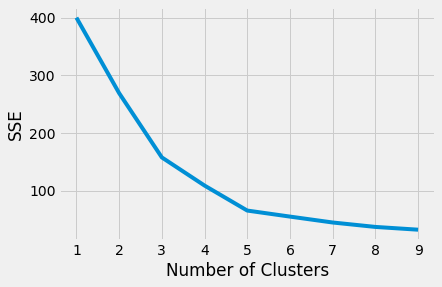

In [29]:
# Elbow method
sse = []
for n in range(1,10):
    kmean = KMeans(n_clusters=n)
    kmean.fit(income_spending_data)
    sse.append(kmean.inertia_)

plt.style.use("fivethirtyeight")
plt.plot(range(1, 10), sse)
plt.xticks(range(1, 10))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

**Observation:** From elbow method we can choose cluster as 5, as after that error is almost constant. But in order to choose the best from elbow method, we can use kneelocator

In [30]:
# Get elbow parameter with KneeLocator
kl = KneeLocator(range(1, 10), sse, curve="convex", direction='decreasing')
kl.elbow

4

**Knee Locator** It is showing the perfect number of cluster is 4.\

As our analysis and Knew locator, is different by 1 cluster so lets go by 5 then.

2. Silhoutte Coefficient

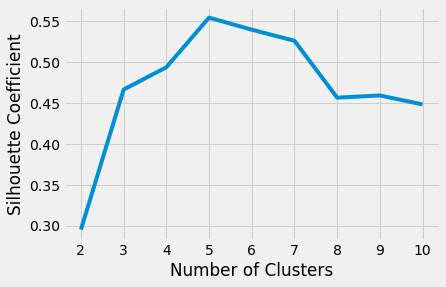

In [31]:
silhouette_coefficients = []

# Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(income_spending_data)
    score = silhouette_score(income_spending_data, kmeans.labels_)
    silhouette_coefficients.append(score)

plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

**Onservation:** As we know that when the Silhoutte coefficient is near to 1 then its best, so here the coefficient value is max at cluster 5, so we will take the number of clusters as 5.

Text(0.5, 1.0, 'Spending Score vs Annual Income')

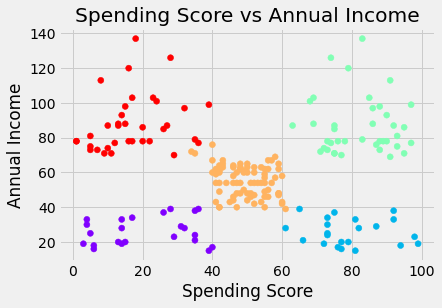

In [32]:
# Lets do clustering with KMean having 5 clusters
kmeans = KMeans(n_clusters=5)
identified_clusters = kmeans.fit_predict(income_spending_data)
data_with_clusters = income_spending_data.copy()
data_with_clusters['Clusters'] = identified_clusters 
plt.scatter(data['Spending Score (1-100)'], data['Annual Income (k$)'],c=data_with_clusters['Clusters'],cmap='rainbow')
plt.xlabel("Spending Score")
plt.ylabel("Annual Income")
plt.title("Spending Score vs Annual Income")

**10. Income vs Spending Score using DBScan**

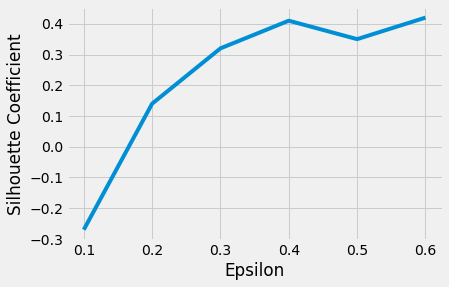

In [34]:
# Epsilon distance best paramaters
dbscan_silhouette = []
distances=[0.1,0.2,0.3,0.4,0.5,0.6]
for index in range(len(distances)):
    dbscan = DBSCAN(eps=distances[index])
    dbscan.fit(income_spending_data)
    score = silhouette_score(income_spending_data, dbscan.labels_).round(2)
    dbscan_silhouette.append(score)

plt.style.use("fivethirtyeight")
plt.plot([0.1,0.2,0.3,0.4,0.5,0.6], dbscan_silhouette)
plt.xticks([0.1,0.2,0.3,0.4,0.5,0.6])
plt.xlabel("Epsilon")
plt.ylabel("Silhouette Coefficient")
plt.show()

**Observation** We can see the eps=0.4 gives a good result

Text(0.5, 1.0, 'Spending Score vs Annual Income')

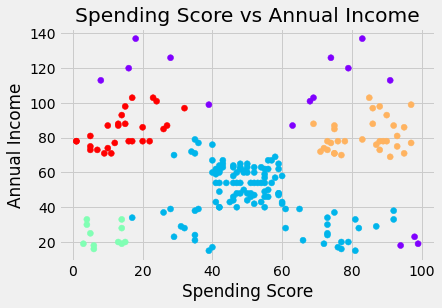

In [35]:
# Lets do clustering with DBScan having epsilon as 0.4
dbscan = DBSCAN(eps=0.4)
identified_clusters = dbscan.fit_predict(income_spending_data)

data_with_clusters = income_spending_data.copy()
data_with_clusters['Clusters'] = identified_clusters 
plt.scatter(data['Spending Score (1-100)'], data['Annual Income (k$)'],c=data_with_clusters['Clusters'],cmap='rainbow')
plt.xlabel("Spending Score")
plt.ylabel("Annual Income")
plt.title("Spending Score vs Annual Income")

**Observation:** We can see that the cluster distribution is not good for DBScan over here, the reason is because the dataset is not very densely seperated.

**11. Age vs Spending Score K-means clustering**

In [36]:
# Transform the data to get the better result, as we are using the distance based calculations
columns_to_transform = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
data_to_transform = data[columns_to_transform]
for i in columns_to_transform:
    # fit on training data column
    scale = StandardScaler().fit(data_to_transform[[i]])
    
    # transform the training data column
    data_to_transform[i] = scale.transform(data_to_transform[[i]])
    
data_to_transform.head()

<ipython-input-36-0e8d0b7208e9>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_to_transform[i] = scale.transform(data_to_transform[[i]])
<ipython-input-36-0e8d0b7208e9>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_to_transform[i] = scale.transform(data_to_transform[[i]])
<ipython-input-36-0e8d0b7208e9>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

Age  Annual Income (k$)  Spending Score (1-100)
0 -1.424569           -1.738999               -0.434801
1 -1.281035           -1.738999                1.195704
2 -1.352802           -1.700830               -1.715913
3 -1.137502           -1.700830                1.040418
4 -0.563369           -1.662660               -0.395980

## Choose appropriate number of clusters
1. Elbow method - Simple observation, or with Kneelocater
2. Silhoutte coefficient

In [37]:
age_spending_data = data_to_transform[['Age', 'Spending Score (1-100)']]
age_spending_data

Age  Spending Score (1-100)
0   -1.424569               -0.434801
1   -1.281035                1.195704
2   -1.352802               -1.715913
3   -1.137502                1.040418
4   -0.563369               -0.395980
..        ...                     ...
195 -0.276302                1.118061
196  0.441365               -0.861839
197 -0.491602                0.923953
198 -0.491602               -1.250054
199 -0.635135                1.273347

[200 rows x 2 columns]

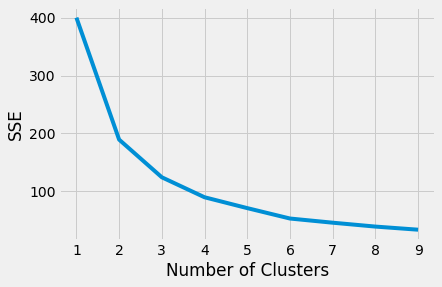

In [39]:
# Elbow method
sse = []
for n in range(1,10):
    kmean = KMeans(n_clusters=n)
    kmean.fit(age_spending_data)
    sse.append(kmean.inertia_)

plt.style.use("fivethirtyeight")
plt.plot(range(1, 10), sse)
plt.xticks(range(1, 10))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

**Observtion:** We can see when the number of cluster is 3, then the Sum of squared error almost converges. So we can take number of cluster as 3. In order to cross validate lets use knee locator 

In [40]:
# Get elbow parameter with KneeLocator
kl = KneeLocator(range(1, 10), sse, curve="convex", direction='decreasing')
kl.elbow

3

Text(0.5, 1.0, 'Spending Score vs Age')

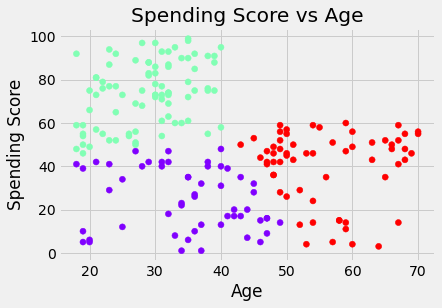

In [41]:
# Lets do clustering with KMean having 3 clusters
kmeans = KMeans(n_clusters=3)
identified_clusters = kmeans.fit_predict(age_spending_data)
data_with_clusters = age_spending_data.copy()
data_with_clusters['Clusters'] = identified_clusters 
plt.scatter(data['Age'], data['Spending Score (1-100)'],c=data_with_clusters['Clusters'],cmap='rainbow')
plt.ylabel("Spending Score")
plt.xlabel("Age")
plt.title("Spending Score vs Age")

**10. Age vs Spending Score using DBScan**

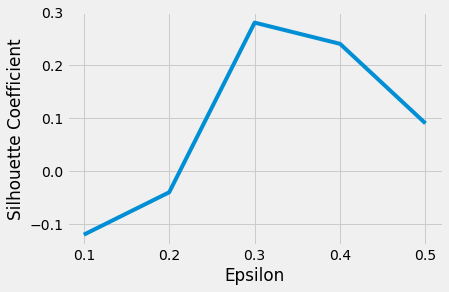

In [42]:
# Epsilon distance best paramaters
dbscan_silhouette = []
distances=[0.1,0.2,0.3,0.4,0.5]
for index in range(len(distances)):
    dbscan = DBSCAN(eps=distances[index])
    dbscan.fit(age_spending_data)
    score = silhouette_score(age_spending_data, dbscan.labels_).round(2)
    dbscan_silhouette.append(score)

plt.style.use("fivethirtyeight")
plt.plot([0.1,0.2,0.3,0.4,0.5], dbscan_silhouette)
plt.xticks([0.1,0.2,0.3,0.4,0.5])
plt.xlabel("Epsilon")
plt.ylabel("Silhouette Coefficient")
plt.show()


**Observation:** Here we can see epsilon value = 0.3, then it needs to be perfect.

Text(0.5, 1.0, 'Spending Score vs Age')

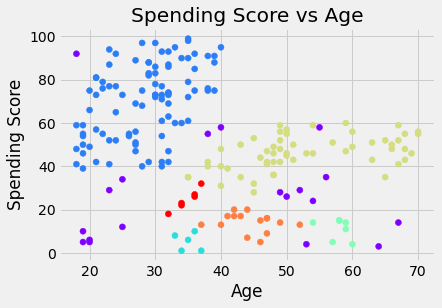

In [43]:
# Lets do clustering with DBScan having epsilon as 0.3
dbscan = DBSCAN(eps=0.3)
identified_clusters = dbscan.fit_predict(age_spending_data)

data_with_clusters = age_spending_data.copy()
data_with_clusters['Clusters'] = identified_clusters 
plt.scatter(data['Age'], data['Spending Score (1-100)'],c=data_with_clusters['Clusters'],cmap='rainbow')
plt.ylabel("Spending Score")
plt.xlabel("Age")
plt.title("Spending Score vs Age")

**Observation:** DBScan doesnot seperate the clusters well, as density is less

* **Final Conclusion:**\
We should focus on the customers having Age from 20-40, as they used to spend more, if want be more specific then the Age should having annual income in between 40-65k